# **Market Segment Analysis for Mall**

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('/content/shopping_trends.csv')

In [3]:
df.shape

(3900, 19)

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### **DATA CLEANING**

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [6]:
# deleting unwanted columns
df.drop(columns = ['Customer ID'], inplace = True)

In [7]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(3900, 18)

In [9]:
# checking for null values
df.isna().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

### **EDA (EXPLORATORY DATA ANALYSIS)**

In [10]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['font.size'] = 10

## 1. DISTRIBUTION OF AGE

<ipython-input-11-4998af4b2e1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  age = sns.distplot(df['Age'], hist_kws= {'rwidth' : 0.8}, bins = np.array([0, 20, 40, 60, 80, 100]));


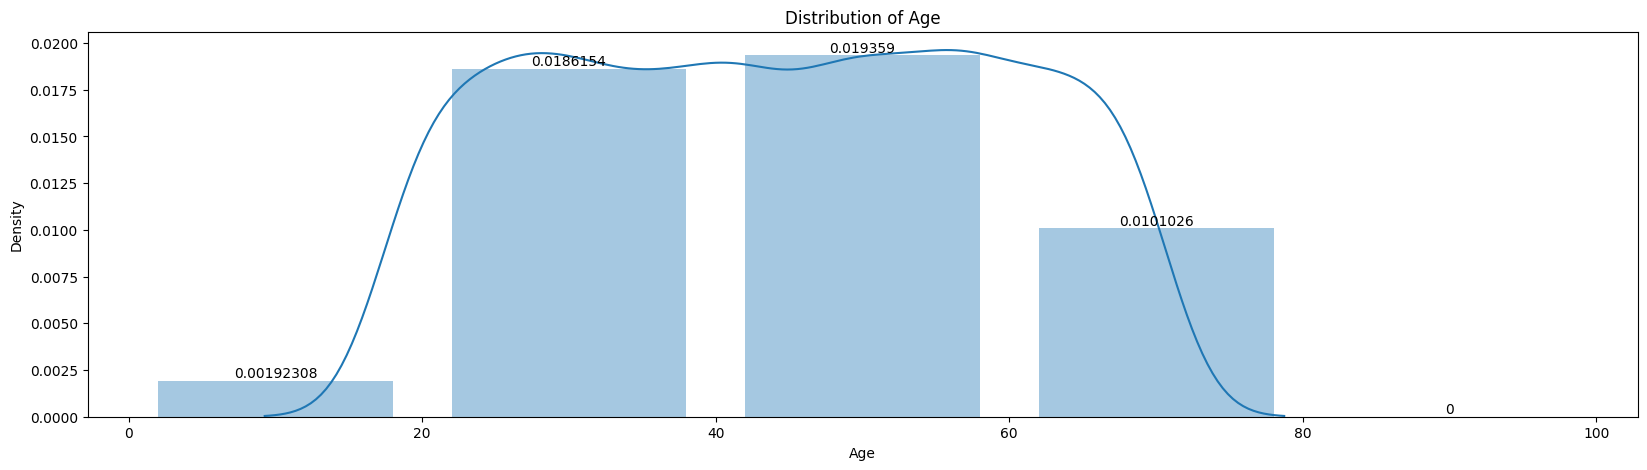

In [11]:
age = sns.distplot(df['Age'], hist_kws= {'rwidth' : 0.8}, bins = np.array([0, 20, 40, 60, 80, 100]));
plt.title('Distribution of Age');
for bars in age.containers:
  age.bar_label(bars)

Conclusion 1 : Mostly people shopping belong to age group 20-60

## 2. GENDER DISTRIBUTION

In [12]:
px.pie(df, names='Gender', title='Gender Distribution')

Conclusion 2: Maximum purchases are made by 'Male'

## 3. MOST COMMONLY PURCHASED ITEMS

In [13]:
item_counts = df['Item Purchased'].value_counts().reset_index()
item_counts.columns = ['Item Purchased', 'Count']

px.bar(item_counts, x='Item Purchased', y='Count',
              title='Most Common Items Purchased',
              labels={'Item Purchased': 'Item Purchased', 'Count': 'Count'})


Conclusion 3: 'Blouse' is the most purchased item followed by 'Jwellery' and 'Pants'

## 4. SEASONWISE SHOPPING

In [14]:
px.pie(df, names='Season', title='Season Distribution')

Conclusion 4: People mostly shop in Spring and Fall

## 5. LOCATION DISTRIBUTION

In [15]:
item_counts = df['Location'].value_counts().reset_index()
item_counts.columns = ['Location', 'Count']
px.bar(item_counts,
               x='Location',
               y='Count',
               title='Location Distribution',
               labels={'index': 'Location', 'Location': 'Count'})

Conclusion 5: Mostly the people prefer shopping from 'Montana' outlet followed by 'California'

## 6. PREFERRED PAYMENT METHOD

In [16]:
# Preferred Payment Method Distribution
px.pie(df, names='Preferred Payment Method', title='Pie Chart : Preferred Payment Method Distribution')

Conclusion 6 : 'PayPal' is the most preferred method followed by 'CreditCard' and 'Cash'

## 7. FREQUENCY OF PURCHASES DISTRIBUTION

In [17]:
px.histogram(df,
             x='Frequency of Purchases',
             nbins=10,
             title='Histogram : Frequency of Purchases Distribution')

Conclusion 7 : Most people prefer shopping after 'Every 3 Months' followed by 'Shopping early'

## 8. PROMO CODE USAGE DISTRIBUTION

In [18]:
px.pie(df, names='Promo Code Used', title='Pie Chart : Promo Code Usage Distribution')

Conclusion 8: Majority people do shopping without using any Promo Code

## 9. SHIPPING TYPE DISTRIBUTION

In [19]:
px.pie(df, names='Shipping Type', title='Pie Chart : Shipping Type Distribution')

Conclusion 9 : Mostly people do 'Free Shipping' followed by 'Standard' and 'Store Pickup'

## 10. AVERGARE REVIEW RATING GENDERWISE

In [20]:
px.box(df, x='Gender', y='Review Rating', title='Box Plot : Purchase Amount by Gender')

Conclusion 10: Average rating by Male > Average rating by Female

## 11. COLOR PREFERENCE DISTRIBUTION

In [21]:
px.pie(df, names='Color', title='Pie Chart : Color Distribution')

Conclusion 11: Mostly people shopping for 'Olive' color clothes  followed by 'Yellow' and 'Silver'

## 12. Category by Gender and Payment Method

In [22]:
px.sunburst(df, path=['Gender', 'Category', 'Payment Method'],
                    values='Purchase Amount (USD)',
                    title='Sunburst Chart: Category by Gender and Payment Method')

Conclusion: 12
- Mostly the shopping is done by Men
- Mostly Men shop for Clothing and Accessories
- The mostly do the payment using Credit Card